Non-reactive: [2200]


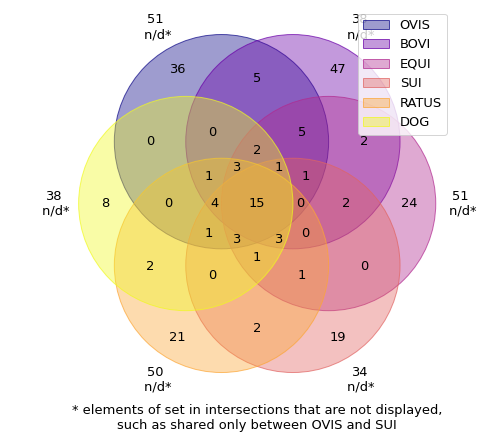

In [11]:
import pandas as pd
from matplotlib.pyplot import subplots
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice
from venn import venn
%matplotlib inline
from collections import Counter
from venn import pseudovenn

animals_set = {
    "OVIS":set(),
    "BOVI": set(),
    "EQUI": set(),
    "SUI":set(),
    "RATUS": set(),
    "DOG": set()    
}

data_df = pd.read_csv("./data.csv") 
data_df_filter = data_df.iloc[:,109:115] #109 to 114
data_filter_ls = data_df_filter.values.tolist()

data_string = []
for index in range(2, len(data_filter_ls)):
    string = ""
    for char in data_filter_ls[index]:
        if int(char) > 1:
            string = string + '1'
        else:
            string = string + char
    data_string.append(string)

letter_counts = Counter(data_string)
df = pd.DataFrame.from_dict(letter_counts, orient='index')

values_of_subsets = df.values.tolist()
labels = list(df.index.values)

new_labesl = []

for string in labels:
    string_final = ""
    if string[0] == '1':
        string_final+= "OVIS - "
    if string[1] == '1':
        string_final+= "BOVI - "
    if string[2] == '1':
        string_final+= "EQUI - "
    if string[3] == '1':
        string_final+= "SUI - "
    if string[4] == '1':
        string_final+= "RATUS - "
    if string[5] == '1':
        string_final+= "DOG - "
    new_labesl.append(string_final)

#for label, value in zip(new_labesl, values_of_subsets):
    #print(f"{label}: {value}")


stamp = "0"

for i in range(len(new_labesl)):
    list_confirm = new_labesl[i].split(" - ")
    stamp_2 = "0"
    for j in range(int(values_of_subsets[i][0])):
        for k in list_confirm:
            if k != "":
                animals_set[k].add(stamp + stamp_2)
        stamp_2 = str(int(stamp_2) + 1)
    stamp = str(int(stamp) + 1) 
                

#venn(animals_set) # Triangula Venn
pseudovenn(animals_set, cmap="plasma")
print(f"Non-reactive: {values_of_subsets[0]}")